이 노트북은 김성훈 교수님의 모두를 위한 딥러닝 강좌 스크립트들을 참고, 재구성하여 만들어졌습니다.


(https://github.com/hunkim/DeepLearningZeroToAll/tree/master/tf2)

필요한 모듈들을 import합니다.

In [1]:
import tensorflow as tf
# 텐서플로우 패키지
import random
# 재현성을 위해 난수 Seed를 고정하기 위해 불러오는 패키지입니다.
from tensorflow.keras.datasets.mnist import load_data

하이퍼 패러미터와 난수 Seed를 설정합니다.

In [2]:
random.seed(777)
# 재현성을 위해 난수를 고정합니다.

# Hyperparameters
# 하이퍼 패러미터란 학습으로 인해 자동으로 최적화되는 값이 아닌,
# 사람이 Huristic하게 최적의 값을 찾아나갈 수 밖에 없는 Parameter들입니다.
learning_rate = 0.001
# 한번에 얼만큼 업데이트 할 것인가에 대한 Hyperparameter입니다.
training_epochs = 15
# 에폭은 전체 데이터셋의 크기 만큼의 한 Loop를 일컫는 단위입니다. 총 몇 에폭 돌지 설정합니다.
batch_size = 100
# 한번에 Feed하는 이미지의 갯수를 결정합니다.
# 초심자 단계에서 당장 신경쓸 필요는 없지만 배치사이즈는 학습속도 뿐만 아니라 최종적인 성능에도 상당한 영향을 미친다고 알려져 있습니다.
drop_rate = 0.3
# Dropout을 할 때 얼만큼 데이터를 탈락시킬 지 결정하는 Parameter입니다.
# (1 - drop_rate)만큼 학습시에 데이터를 보존합니다.
# 최신버전 텐서플로우는 Dropout layer의 인자로 keep_prob 대신 rate를 전달하도록 권장하고 있는데(Keyword 인자로 전달 시 여전히 keep_prob도 사용가능하긴 함)
# 아마 Dropout에 전달하는 Non-Keyword 인자로서 이쪽이 더 직관적이라고 생각한 듯 합니다.

MNIST 데이터셋은 텐서플로우에서 자체적으로 제공하므로 텐서플로우 API를 이용해 데이터를 불러옵니다.

Input을 1자로 펴주고, Label을 One-Hot 인코딩으로 전환해줍니다.

In [3]:
(x_train, y_train), (x_test, y_test) = load_data()
# 텐서플로우에서 지원하는 API를 사용합니다.
# x_train, y_train 쌍은 학습 데이터셋의 Input, Label 쌍이고
# x_test, y_test 쌍은 평가 데이터셋의 Input, Label 쌍입니다.

x_train = x_train.reshape(x_train.shape[0], 28 * 28)
x_test = x_test.reshape(x_test.shape[0], 28 * 28)
# Fully Connected Layer에 Feed하기 위해 Input(이미지)을 1자로 펴줍니다.

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)
# Label을 One-Hot 인코딩으로 전환해줍니다.

모델을 구성합니다. 딥러닝 소스코드의 심장에 해당하는 부분입니다.


단순 일방향 Feeding 구조를 가진 모델을 구현할 때는 텐서플로우의 Sequential API를 사용하면 매우 편리합니다.

In [4]:
model = tf.keras.Sequential()
# tf.keras.Sequential API를 사용해 레이어들을 추가할 빈 신경망을 정의합니다.

# 텐서플로우 2.X에서는 Layer를 정의함과 동시에 Sequential.add를 통해 바로 추가할 수 있습니다.
model.add(tf.keras.layers.Dense(input_dim=784, units=512, kernel_initializer=tf.keras.initializers.RandomNormal(stddev=0.05), use_bias=True, activation='relu'))
# 입력이 784 채널, 출력이 512 채널이고, Bias가 있으며, 활성화함수로 relu를 사용하는 Layer를 정규분포에서 초기화합니다.
# Bias들은 별도로 지정하지 않으면 0으로 초기화됩니다.

model.add(tf.keras.layers.Dropout(drop_rate))
# Regularization을 위해 Dropout을 정의, 추가합니다.

# 위와 같은 방식으로 나머지 부분의 신경망을 정의, 추가합니다.
model.add(tf.keras.layers.Dense(units=512, kernel_initializer=tf.keras.initializers.RandomNormal(stddev=0.05), use_bias=True, activation='relu'))
model.add(tf.keras.layers.Dropout(drop_rate))
model.add(tf.keras.layers.Dense(units=512, kernel_initializer=tf.keras.initializers.RandomNormal(stddev=0.05), use_bias=True, activation='relu'))
model.add(tf.keras.layers.Dropout(drop_rate))
model.add(tf.keras.layers.Dense(units=512, kernel_initializer=tf.keras.initializers.RandomNormal(stddev=0.05), use_bias=True, activation='relu'))
model.add(tf.keras.layers.Dropout(drop_rate))
model.add(tf.keras.layers.Dense(units=10, kernel_initializer=tf.keras.initializers.RandomNormal(stddev=0.05), use_bias=True, activation=None))
# 마지막 Layer의 활성화함수로는 SoftMax를 사용합니다.

model.compile(loss=lambda x, y : tf.keras.backend.mean(tf.keras.losses.categorical_crossentropy(x, y, from_logits=True)) ,
                 optimizer=tf.keras.optimizers.Adam(lr=learning_rate), metrics=['accuracy'])
# Loss Function과 Optimizer, Metric을 한번에 정의합니다.
# 최적화엔 Adam Optimizer를 사용합니다.
# lr=learning_rate로 Hyperparameter인 Learning Rate를 입력해줍니다.

model.summary()
# 정의한 모델을 한 번 출력해봅니다.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               2

텐서플로우는 단일 GPU이고 텐서플로우 GPU버전이 설치되어 있을 경우, 별도의 코드 추가 없이도 자동으로 GPU 가속이 적용됩니다.

In [5]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()
# GPU가 사용가능한지만 확인해줍니다.

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 9194642233605946591, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 4252652729509244629
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 863552852251682396
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14648777152
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 3668393343728659724
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

텐서플로우 2.X에서는 직접 트레이닝 루프를 코딩할 필요가 없습니다. model.fit()을 사용해 쉽게 학습시킵니다.

In [6]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=training_epochs)
# Input, Label, 배치 크기, 반복수 순으로 입력합니다.

Epoch 1/15
600/600 [==============================] - 2s 3ms/step - loss: 3.2019 - accuracy: 0.7480
Epoch 2/15
600/600 [==============================] - 2s 3ms/step - loss: 0.4267 - accuracy: 0.8804
Epoch 3/15
600/600 [==============================] - 2s 3ms/step - loss: 0.3021 - accuracy: 0.9146
Epoch 4/15
600/600 [==============================] - 2s 3ms/step - loss: 0.2461 - accuracy: 0.9309
Epoch 5/15
600/600 [==============================] - 1s 2ms/step - loss: 0.2142 - accuracy: 0.9406
Epoch 6/15
600/600 [==============================] - 2s 3ms/step - loss: 0.1962 - accuracy: 0.9459
Epoch 7/15
600/600 [==============================] - 2s 3ms/step - loss: 0.1843 - accuracy: 0.9501
Epoch 8/15
600/600 [==============================] - 1s 2ms/step - loss: 0.1863 - accuracy: 0.9503
Epoch 9/15
600/600 [==============================] - 2s 3ms/step - loss: 0.1826 - accuracy: 0.9525
Epoch 10/15
600/600 [==============================] - 2s 3ms/step - loss: 0.1810 - accuracy: 0.9532

학습이 완료된 모델을 이용해 정확도(Accuracy)를 구해봅니다.

In [7]:
evaluation = model.evaluate(x_test, y_test)
print('loss: ', evaluation[0])
print('accuracy', evaluation[1])
# 정확도 역시 직접 코딩할 필요 없이 evaluation 메소드 하나로 쉽게 구할 수 있습니다.
# evaluate 메소드를 사용하는 순간 자동으로 평가모드가 되서 Dropout을 제거하고
# Batchnormalization 패러미터를 이동평균으로 바꿔주는 등의 행동을 수행합니다.

313/313 [==============================] - 1s 2ms/step - loss: 0.1237 - accuracy: 0.9696
loss:  0.1237238273024559
accuracy 0.9696000218391418


모델이 잘 작동하는지 예시 하나를 직접 눈으로 확인합니다

In [8]:
import numpy as np

y_predicted = model.predict(x_test)
# predict 메소드를 사용하는 순간 자동으로 평가모드가 되서 Dropout을 제거하고
# Batchnormalization 패러미터를 이동평균으로 바꿔주는 등의 행동을 수행합니다.

random_index = random.randint(0, x_test.shape[0]-1)
# 랜덤한 인덱스를 하나 뽑습니다.

print("Label: ", np.argmax(y_test[random_index]))
print("Prediction: ", np.argmax(y_predicted[random_index]))
# 예측값과 정답을 비교해봅니다.

Label:  8
Prediction:  8


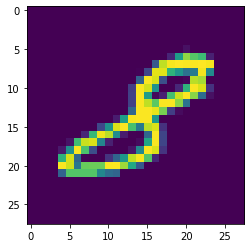

In [9]:
import matplotlib.pyplot as plt

plt.imshow(np.squeeze(x_test[random_index].reshape(28, 28)))
# 예측에 사용했던 숫자의 이미지를 시각화 해봅니다.

위 과정을 모두 완료하셨으면 오버피팅 현상을 경험해보기 위해 학습을 더 시키고 정확도를 확인해 봅시다.